# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather"

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    # Build partial query URL
    query_url = f"{url}?q={city}&units=imperial&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    
    try:
        
        
        city_name.append(response['name'])
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        humidity.append(response['main']['humidity'])

        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])

        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    
        print (f"Processing Record {cities.index(city)+1} of Set {set} | {city}")
        
    
    except:
        print("City not found. Skipping...")
        set = set + 1
        pass
    
print("""
-----------------------------
Data Retrieval Complete      
-----------------------------
""")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mnogovershinnyy
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | medvedevo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | xining
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | khandagayty
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | asfi
Processing Record 12 of Set 1 | hualmay
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | xocali
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | pangoa
Processing Record 23 of Set 1 | khash
Processing 

Processing Record 199 of Set 18 | san patricio
Processing Record 200 of Set 18 | morondava
Processing Record 201 of Set 18 | san carlos de bariloche
Processing Record 202 of Set 18 | kluang
Processing Record 203 of Set 18 | lazaro cardenas
Processing Record 204 of Set 18 | haapiti
Processing Record 205 of Set 18 | ondjiva
Processing Record 206 of Set 18 | klaksvik
Processing Record 207 of Set 18 | saint-georges
Processing Record 208 of Set 18 | barra patuca
Processing Record 209 of Set 18 | tiksi
Processing Record 210 of Set 18 | antofagasta
Processing Record 211 of Set 18 | namtsy
Processing Record 212 of Set 18 | fortuna
Processing Record 213 of Set 18 | pusztaszabolcs
Processing Record 214 of Set 18 | hegang
Processing Record 215 of Set 18 | aykhal
Processing Record 216 of Set 18 | henties bay
Processing Record 217 of Set 18 | heihe
Processing Record 218 of Set 18 | kokuy
Processing Record 219 of Set 18 | sinnamary
Processing Record 220 of Set 18 | kannangad
Processing Record 221 of

City not found. Skipping...
Processing Record 397 of Set 37 | marsaxlokk
Processing Record 398 of Set 37 | sorland
City not found. Skipping...
Processing Record 400 of Set 38 | la palma
Processing Record 401 of Set 38 | saint-augustin
Processing Record 402 of Set 38 | sabha
Processing Record 403 of Set 38 | yar
Processing Record 404 of Set 38 | padang
Processing Record 405 of Set 38 | mwinilunga
Processing Record 406 of Set 38 | asau
Processing Record 407 of Set 38 | zyryanka
Processing Record 408 of Set 38 | najran
Processing Record 409 of Set 38 | sindor
Processing Record 410 of Set 38 | esperance
Processing Record 411 of Set 38 | ixtapa
Processing Record 412 of Set 38 | olga
Processing Record 413 of Set 38 | bathsheba
Processing Record 414 of Set 38 | nanortalik
Processing Record 415 of Set 38 | saint-joseph
Processing Record 416 of Set 38 | flin flon
Processing Record 417 of Set 38 | medvedok
Processing Record 418 of Set 38 | barrow
Processing Record 419 of Set 38 | gambela
Process

Processing Record 592 of Set 52 | effingham
Processing Record 593 of Set 52 | pouembout
Processing Record 594 of Set 52 | oistins
Processing Record 595 of Set 52 | biltine
Processing Record 596 of Set 52 | marratxi
Processing Record 597 of Set 52 | mecca
Processing Record 598 of Set 52 | boyuibe
Processing Record 599 of Set 52 | neftegorsk
Processing Record 600 of Set 52 | koulikoro
Processing Record 601 of Set 52 | parrita
Processing Record 602 of Set 52 | melbu
Processing Record 603 of Set 52 | peterhead
Processing Record 604 of Set 52 | edea
Processing Record 605 of Set 52 | myaundzha
Processing Record 606 of Set 52 | mujiayingzi
Processing Record 607 of Set 52 | broken hill
Processing Record 608 of Set 52 | sao jose da coroa grande
Processing Record 609 of Set 52 | trairi
Processing Record 610 of Set 52 | paracuru
Processing Record 611 of Set 52 | souillac
City not found. Skipping...
Processing Record 613 of Set 53 | toowoomba
Processing Record 614 of Set 53 | ajra
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lon" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed    
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("cities.csv", index=True, header=True)

weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Mnogovershinnyy,0,RU,1581982954,88,53.94,139.92,2.43,3.47
1,Hobart,20,AU,1581982818,55,-42.88,147.33,70.00,6.93
2,Medvedevo,75,RU,1581983109,100,56.63,47.80,33.80,20.13
3,Ushuaia,90,AR,1581982913,70,-54.80,-68.30,48.20,16.11
4,Xining,83,CN,1581983110,44,36.62,101.77,13.08,2.01
...,...,...,...,...,...,...,...,...,...
558,Paracuru,100,BR,1581983245,83,-3.41,-39.03,79.00,3.36
559,Souillac,75,MU,1581982936,94,-20.52,57.52,75.20,12.26
560,Toowoomba,59,AU,1581983174,69,-27.55,151.97,80.01,12.75
561,Ajra,17,IN,1581983246,37,16.12,74.20,71.24,7.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

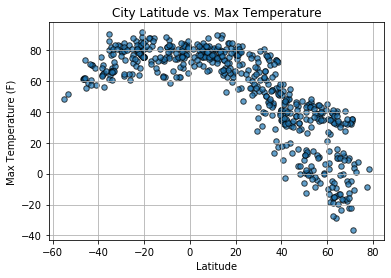

In [6]:
plt.figure(1)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Max Temp', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig1.png")

# Show the Figure
plt.show()

Here, the data points appear to be tight indicating a high correlation between our variables - latitude and maximum temperature.

#### Latitude vs. Humidity Plot

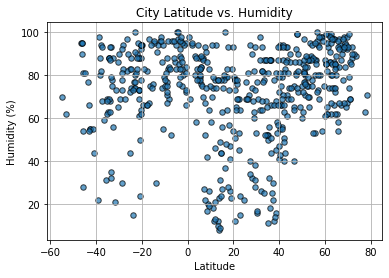

In [7]:
plt.figure(2)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Humidity', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig2.png")

# Show the Figure
plt.show()

The scatter plot tells us that are randomly selected sample data show no correlation for our variables humidity and latitude.

#### Latitude vs. Cloudiness Plot

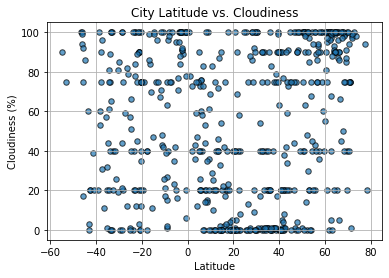

In [8]:
plt.figure(3)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Cloudiness', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig3.png")

# Show the Figure
plt.show()

This graph tells us that there is no correlation between our variables - latitude and cloudiness. There doesn't seem to be a pattern on how the data points lie and does not seem to go in any particular direction either.

#### Latitude vs. Wind Speed Plot

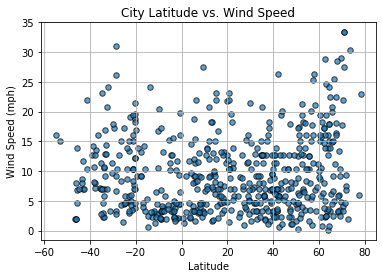

In [9]:
plt.figure(4)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Wind Speed', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig4.png")

# Show the Figure
plt.show()

This scatter plot tells us how the wind speed is affected by Latitude.

## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_data = weather_data[weather_data['Lat'] >= 0]
southern_hemisphere_data = weather_data[weather_data['Lat'] < 0]

In [11]:
southern_hemisphere_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
1,Hobart,20,AU,1581982818,55,-42.88,147.33,70.00,6.93
3,Ushuaia,90,AR,1581982913,70,-54.80,-68.30,48.20,16.11
5,Punta Arenas,75,CL,1581982907,62,-53.15,-70.92,51.80,14.99
6,Bluff,100,NZ,1581982913,95,-46.60,168.33,61.00,1.99
11,Hualmay,43,PE,1581982940,74,-11.10,-77.61,72.84,6.46
...,...,...,...,...,...,...,...,...,...
557,Trairi,100,BR,1581983245,92,-3.28,-39.27,75.29,2.30
558,Paracuru,100,BR,1581983245,83,-3.41,-39.03,79.00,3.36
559,Souillac,75,MU,1581982936,94,-20.52,57.52,75.20,12.26
560,Toowoomba,59,AU,1581983174,69,-27.55,151.97,80.01,12.75


In [12]:
from sklearn.linear_model import LinearRegression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8424712478483692


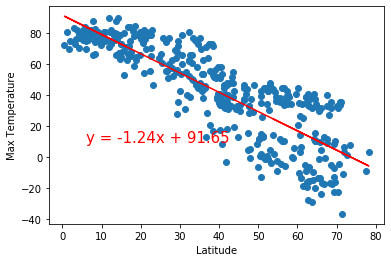

In [13]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43312865187085425


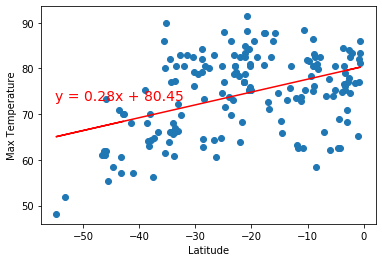

In [14]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq  = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,73),fontsize=14,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Max Temp vs. Latitude Linear Regression</b>
>This scatter plot tells us how max temperature is affected by Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35702022914557957


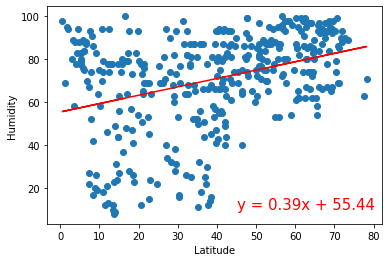

In [15]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3024366452638936


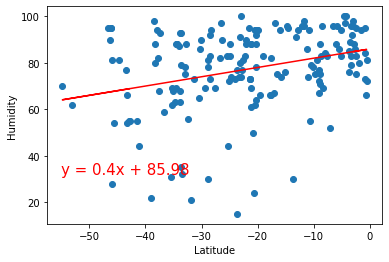

In [16]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-55,32),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Humidity vs. Latitude Linear Regression</b>
>This scatter plot tells us how max temperature is affected by Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.39801873603116317


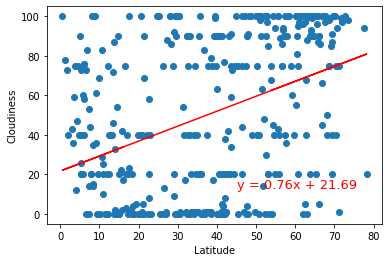

In [17]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(45,13),fontsize=13,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17397890987013426


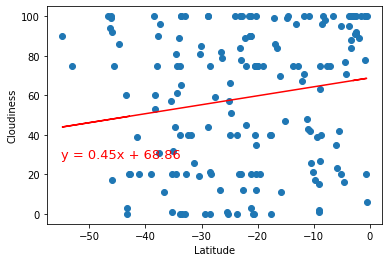

In [18]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-55,28),fontsize=13,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Cloudiness vs. Latitude Linear Regression</b>
>This scatter plot tells us how max temperature is affected by Latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19814515256241835


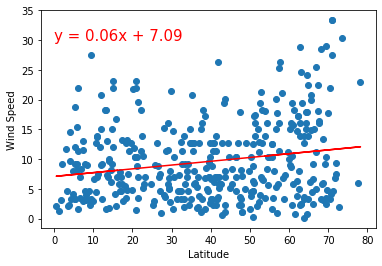

In [19]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(0,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20723628157147891


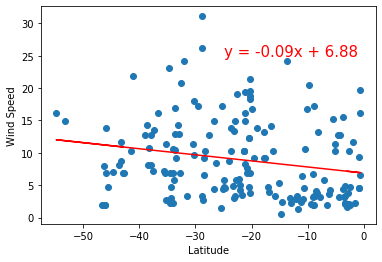

In [20]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Cloudiness vs. Latitude Linear Regression</b>
>This scatter plot tells us how max temperature is affected by Latitude.